# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Year'>

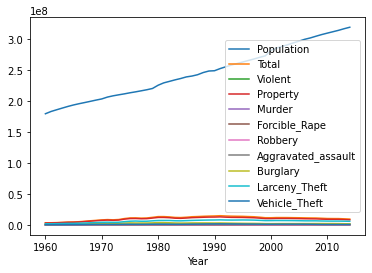

In [2]:
import pandas as pd
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")


df.set_index("Year", inplace=True)

df.plot()



In [3]:
df['index'] = df.index

In [4]:
df.rename(columns={df.columns[11]: "Year"}, inplace = True)

In [5]:
df = df.reset_index(drop = True)

# 3

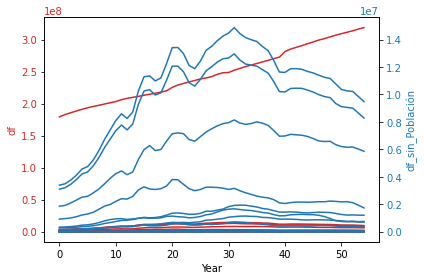

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data1 = df.drop('Population', axis=1)
data2 = df


# Create some mock data

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('df', color=color)
ax1.plot( data2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('df_sin_Población', color=color)  # we already handled the x-label with ax1
ax2.plot(data1, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# 4

In [8]:
# Creo un nuevo dataframe sin las columnas 'Population' y 'Total'
df_1 = df.iloc[:, 2:12]  # Primera, tercera y segunda columnas


In [9]:
df_1.corr()

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Year
Violent,1.000000,0.943351,0.795300,0.973914,0.919249,0.981071,0.646607,0.974791,0.909182,0.715312
Property,0.943351,1.000000,0.895641,0.912517,0.965363,0.875536,0.847149,0.980528,0.906130,0.571376
Murder,0.795300,0.895641,1.000000,0.699655,0.960156,0.668511,0.920207,0.806279,0.856600,0.256010
Forcible_Rape,0.973914,0.912517,0.699655,1.000000,0.847794,0.974379,0.588529,0.967417,0.826284,0.825216
Robbery,0.919249,0.965363,0.960156,0.847794,1.000000,0.826500,0.864444,0.920460,0.916280,0.451001
Aggravated_assault,0.981071,0.875536,0.668511,0.974379,0.826500,1.000000,0.498449,0.941906,0.858725,0.792431
Burglary,0.646607,0.847149,0.920207,0.588529,0.864444,0.498449,1.000000,0.734091,0.690423,0.157445
Larceny_Theft,0.974791,0.980528,0.806279,0.967417,0.920460,0.941906,0.734091,1.000000,0.885326,0.703818
Vehicle_Theft,0.909182,0.906130,0.856600,0.826284,0.916280,0.858725,0.690423,0.885326,1.000000,0.436975
Year,0.715312,0.571376,0.256010,0.825216,0.451001,0.792431,0.157445,0.703818,0.436975,1.000000


### Columnas con mejor correlación

In [14]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Función para obtener el Top x de correlaciones más altas que queramos

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_1, 3))


Top Absolute Correlations
Violent   Aggravated_assault    0.981071
Property  Larceny_Theft         0.980528
Violent   Larceny_Theft         0.974791
dtype: float64


## Regresión no lineal con las 5 columnas que mejor correlacionan con "Murder"

### Las 5 variables que mejor correlacionan con 'Murder'

In [23]:
correlation_murder = df_1.corr()

In [24]:
corr_pairs = correlation_murder.unstack()

In [25]:
sort_pairs = corr_pairs.sort_values(kind='quicksort')

In [56]:
strong_pairs = sort_pairs[abs(sort_pairs) > 0.80] 

In [57]:
strong_pairs['Murder']

Larceny_Theft    0.806279
Vehicle_Theft    0.856600
Property         0.895641
Burglary         0.920207
Robbery          0.960156
Murder           1.000000
dtype: float64

In [60]:
# las 5 columnas que mejor correlacionan con 'Murder' son: Robbery, Burglary, Property, Vehicle_Theft y Larceny_Theft
# Creamos un nuevo dataframe con estas columnas + la de Murder
df_Murder = df_1.iloc[:, [1,2,4,6,7,8]]


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Regresión polinómica
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold



In [62]:
X = df_Murder.iloc[:,[0,2,3,4,5]]
y = df_Murder.iloc[:,[1]]

In [63]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

In [64]:
degree_min = 6
degree_max = 10
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1,1),y_train)

    #######
    
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

# validamos el modelo con validación cruzada

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2,random_state=36851234)
for train_index, val_index in rskf.split(X, y):
    print("TRAIN:", train_index, "VAL:", val_index)
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    rand_forest.fit(X_train, y_train)
    score_val = rand_forest.score(X_val, y_val)
    print("score_val:", score_val)
    print("y_val:", y_val)
    print("------------")
# Iteración 1
train_index = [1, 2, 3, 4]
val_index = [0, 5]
    


################
(220, 7)


ValueError: Found input variables with inconsistent numbers of samples: [220, 44]

In [55]:
degree_min = 6
degree_max = 10
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1,1),y_train)

    #######
    
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

      
    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Polinominal degree " + str(degree))
    plt.show()
    input("Enter to next grade")

################
(220, 7)


ValueError: Found input variables with inconsistent numbers of samples: [220, 44]

In [57]:
X = df_Murder.iloc[:,[0]]
y = df_Murder.iloc[:,[1]]

In [58]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

################
(44, 7)
y_pred (44, 1)
Score: 0.7745052321352864
MAE: 1654.733372212114


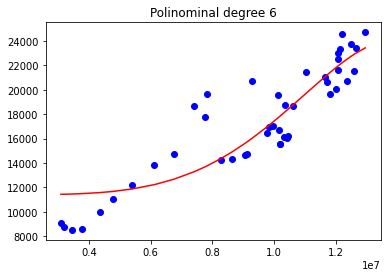

################
(44, 8)
y_pred (44, 1)
Score: 0.7578852506445148
MAE: 1677.475977564018


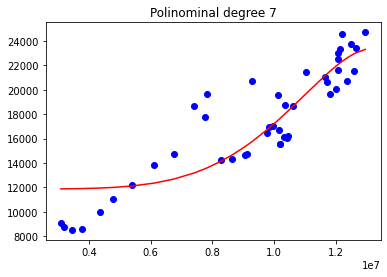

################
(44, 9)
y_pred (44, 1)
Score: 0.7421838407471469
MAE: 1711.727472941854


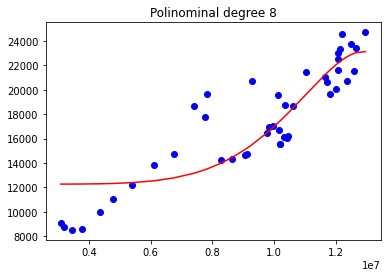

################
(44, 10)
y_pred (44, 1)
Score: 0.727301680968806
MAE: 1756.389030496741


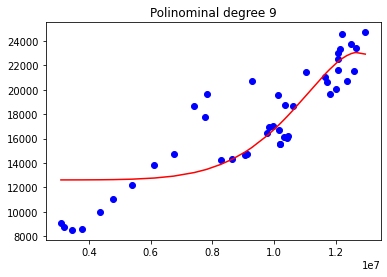

################
(44, 11)
y_pred (44, 1)
Score: 0.7129337234616895
MAE: 1795.2926809443888


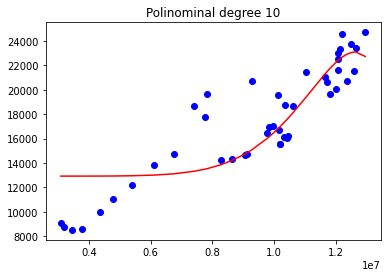

In [59]:
degree_min = 6
degree_max = 10
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1,1),y_train)

    #######
    
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Polinominal degree " + str(degree))
    plt.show()
    input("Enter to next grade")

C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.85606e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


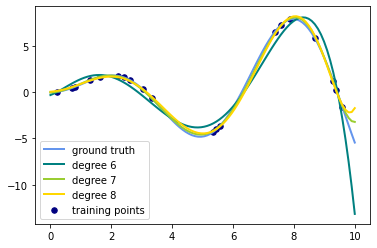

In [60]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([6, 7, 8]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [61]:
X = df_Murder.iloc[:,[2]]
y = df_Murder.iloc[:,[1]]

In [62]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

################
(44, 7)
y_pred (44, 1)
Score: 0.9253806880397728
MAE: 1012.8124253483173


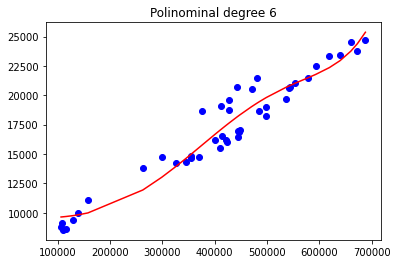

################
(44, 8)
y_pred (44, 1)
Score: 0.9097765539286975
MAE: 1140.448667818346


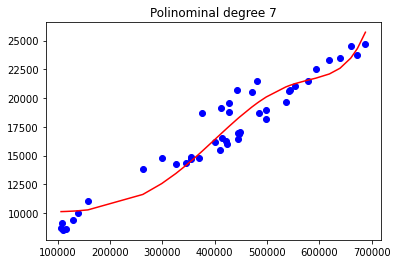

################
(44, 9)
y_pred (44, 1)
Score: 0.884878095624378
MAE: 1305.1852141249383


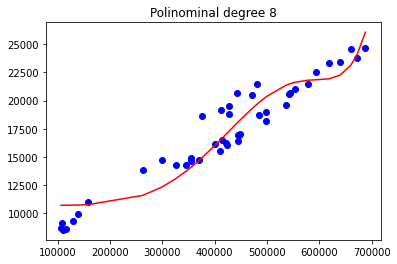

################
(44, 10)
y_pred (44, 1)
Score: 0.8515669781543901
MAE: 1479.3109987938792


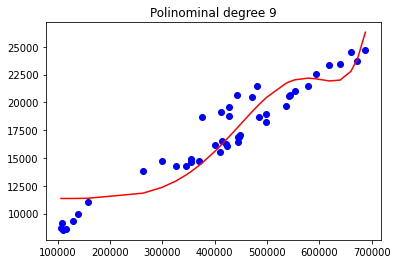

################
(44, 11)
y_pred (44, 1)
Score: 0.8124068374113621
MAE: 1613.9283165026993


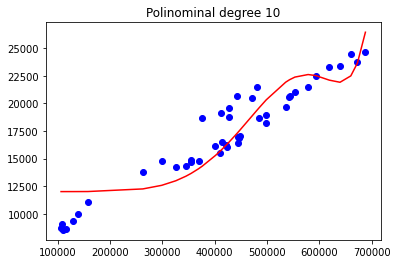

In [63]:
degree_min = 6
degree_max = 10
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1,1),y_train)

    #######
    
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Polinominal degree " + str(degree))
    plt.show()
    input("Enter to next grade")

C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.85606e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


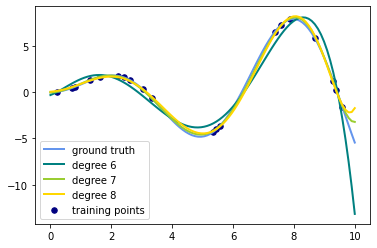

In [56]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([6, 7, 8]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [64]:
X = df_Murder.iloc[:,[3]]
y = df_Murder.iloc[:,[1]]

In [65]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

################
(44, 7)
y_pred (44, 1)
Score: 0.8894128859770306
MAE: 1043.242477255314


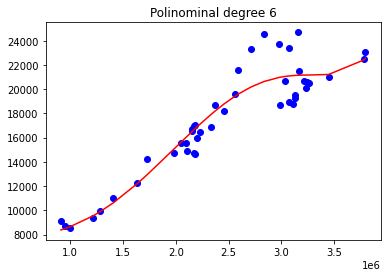

################
(44, 8)
y_pred (44, 1)
Score: 0.8986995820737271
MAE: 1012.3175270908793


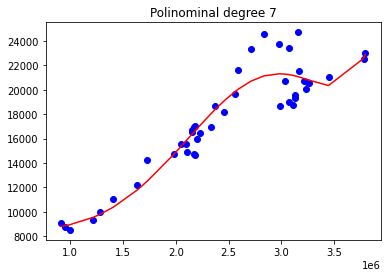

################
(44, 9)
y_pred (44, 1)
Score: 0.8989167326642022
MAE: 1065.141897669656


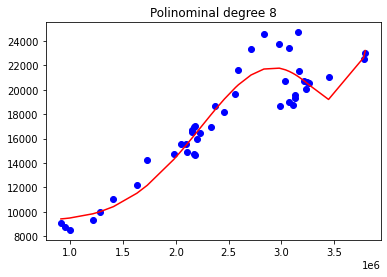

################
(44, 10)
y_pred (44, 1)
Score: 0.8818444932696878
MAE: 1214.829768400089


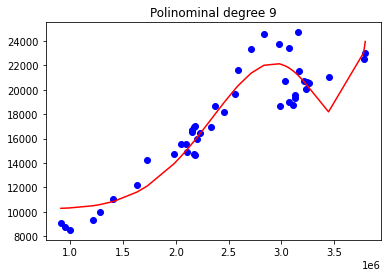

################
(44, 11)
y_pred (44, 1)
Score: 0.8462217391717934
MAE: 1388.300933978754


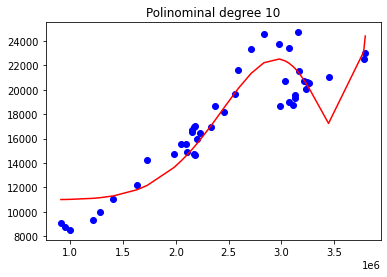

In [66]:
degree_min = 6
degree_max = 10
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1,1),y_train)

    #######
    
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Polinominal degree " + str(degree))
    plt.show()
    input("Enter to next grade")

C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.85606e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


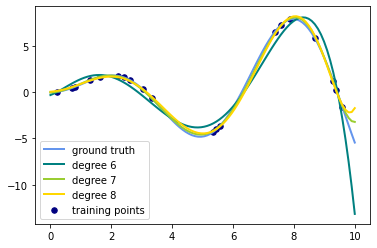

In [68]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([6, 7, 8]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [ ]:
X = df_Murder.iloc[:,[4]]
y = df_Murder.iloc[:,[1]]

In [ ]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

In [ ]:
degree_min = 6
degree_max = 10
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1,1),y_train)

    #######
    
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Polinominal degree " + str(degree))
    plt.show()
    input("Enter to next grade")

In [ ]:
X = df_Murder.iloc[:,[5]]
y = df_Murder.iloc[:,[1]]

In [ ]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

In [ ]:
degree_min = 6
degree_max = 10
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1,1),y_train)

    #######
    
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Polinominal degree " + str(degree))
    plt.show()
    input("Enter to next grade")

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([6, 7, 8]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [ ]:
Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.